## Assignment 2: Kinematics - Part 2

### Pranay Palem

### Part 5

In [1]:
import numpy
import math
import matplotlib.pyplot as plt
import sympy

from mpl_toolkits.mplot3d import Axes3D

from sympy import symbols, Matrix, pi, cos, sin, I, acos, sqrt
from sympy import Quaternion
import scipy.optimize

In [ ]:
# Google Colab compatibility
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab")
except ImportError:
    IN_COLAB = False
    print("Running locally")

# Install required packages for animation if in Colab
if IN_COLAB:
    !pip install pillow matplotlib numpy sympy scipy

In [2]:
p0, p1, p2, p3, p4, p5 = symbols('p_0 , p_1, p_2, p_3, p_4, p_5 ')
q1, q2 ,q3= symbols('\\theta_1, \\theta_2, \\theta_3')

In [3]:
p0 = sympy.Matrix([0,0,0])
p1 = sympy.Matrix([3,5,0])
p2 = sympy.Matrix([5,-1,0])
p3 = sympy.Matrix([9,1,0])
p4 = sympy.Matrix([11,6,0])
p5 = sympy.Matrix([7,6,0])

#### 1. Defining Rigid body

In [4]:
#p0p1 = p0-p1
p0p1 = p1-p0

#p0p2 = p0-p2
p0p2 = p2-p0

#p2p1 = p2-p1
p2p1 = p1-p2

#1p5 = p1-p5
p1p5 = p5-p1

#p2p5 = p2-p5
p2p5 = p5-p2

#p2p3 = p2-p3
p2p3 = p3-p2

#p3p5 = p3-p5
p3p5 = p5-p3

#p3p5 = p3-p5

#p5p4 = p5-p4
p5p4 = p4-p5

#p3p4 = p3-p4
p3p4 = p4-p3
#p3p4 = p3-p4


In [5]:
p2p1

Matrix([
[-2],
[ 6],
[ 0]])

In [6]:
p2p5

Matrix([
[2],
[7],
[0]])

In [7]:
p3p5

Matrix([
[-2],
[ 5],
[ 0]])

#### 2. Defining unit quaternion

In [8]:
def Rq(theta, vect):

    q = Quaternion(0, vect[0],vect[1],vect[2])
    unitq = q/q.norm()
    rotq = sympy.cos(theta/2)+(sympy.sin(theta/2)*unitq)
    
    return rotq, unitq, q


In [9]:
r21, unit21 , q21 = Rq(q1, p2p1)
r25, unit25 , q25 = Rq(q2, p2p5)
r35, unit35 , q35 = Rq(q3, p3p5)
r25

cos(\theta_2/2) + 2*sqrt(53)*sin(\theta_2/2)/53*i + 7*sqrt(53)*sin(\theta_2/2)/53*j + 0*k

In [10]:
unit25

0 + 2*sqrt(53)/53*i + 7*sqrt(53)/53*j + 0*k

In [11]:
q25

0 + 2*i + 7*j + 0*k

#### 3. We can define $\vec{r}$ as

$\vec{r}$ = $\vec{p_0p_1} + \vec{p_1p_5} + \vec{p_5p_4}$ <br> or <br>
$\vec{r}$ = $\vec{p_0p_2} + \vec{p_2p_3} + \vec{p_3p_4}$

#### 4. To define $\vec{r}$ in $\hat{a_x},\hat{a_y},\hat{a_z}$

lets define the following 

$$
    \vec{v_1} = v
$$
$$
    \vec{v_2} = \vec{p_1p_5}
$$
$$
    \vec{v_3} = \vec{p_5p_4}
$$

$$
    \vec{r} = \vec{p_0p_1}
$$


In [12]:
v1_in_a = Quaternion(0, p0p1[0], p0p1[1], p0p1[2])
v2_in_b = Quaternion(0, p1p5[0], p1p5[1], p1p5[2])
v3_in_c = Quaternion(0, p5p4[0], p5p4[1], p5p4[2])

v4_in_a = Quaternion(0, p0p2[0], p0p2[1], p0p2[2])
v5_in_b = Quaternion(0, p2p3[0], p2p3[1], p2p3[2])
v6_in_c = Quaternion(0, p3p4[0], p3p4[1], p3p4[2])

v6_in_c

0 + 2*i + 5*j + 0*k

In [13]:
v6_in_c.conjugate()

0 + (-2)*i + (-5)*j + 0*k

In [14]:
def qtransform(q, r):

    rconj = r.conjugate()

    #temp = r*q
    qTransformed = r * q * rconj
    #qTransformed = rconj * q * r
    
    return qTransformed


In [15]:
v1_in_a

0 + 3*i + 5*j + 0*k

In [16]:
v2_in_a = qtransform(v2_in_b, r21)
v2_in_a

#v2_in_a = qtransform(v2_in_b, unit21)
#v2_in_a

0 + (-19*sin(\theta_1/2)**2/5 + 4*cos(\theta_1/2)**2)*i + (-8*sin(\theta_1/2)**2/5 + cos(\theta_1/2)**2)*j + (-13*sqrt(10)*sin(\theta_1/2)*cos(\theta_1/2)/5)*k

In [17]:
v3_in_b = qtransform(v3_in_c, r35)
v3_in_b = qtransform(v3_in_b, r25)
v3_in_a = qtransform(v3_in_b, r21)
v3_in_a = v3_in_a.simplify()
v3_in_a

#v3_in_b = qtransform(v3_in_c, unit35)
#v3_in_b = qtransform(v3_in_b, unit25)
#v3_in_a = qtransform(v3_in_b, unit21)
#v3_in_a

0 + (-4836*cos(\theta_1)/7685 + 1248*cos(\theta_2)/7685 - 912*cos(\theta_3)/1537 - 144*sqrt(530)*cos(\theta_1 - \theta_2)/7685 + 2736*cos(\theta_1 - \theta_2)/7685 + 2736*cos(\theta_1 + \theta_2)/7685 + 144*sqrt(530)*cos(\theta_1 + \theta_2)/7685 + 936*cos(\theta_1 - \theta_3)/1537 + 936*cos(\theta_1 + \theta_3)/1537 - 13*sqrt(1537)*cos(\theta_2 - \theta_3)/1537 + 403*cos(\theta_2 - \theta_3)/1537 + 403*cos(\theta_2 + \theta_3)/1537 + 13*sqrt(1537)*cos(\theta_2 + \theta_3)/1537 - 3*sqrt(290)*cos(-\theta_1 + \theta_2 + \theta_3)/58 - 93*sqrt(530)*cos(-\theta_1 + \theta_2 + \theta_3)/3074 + 1767*cos(-\theta_1 + \theta_2 + \theta_3)/3074 + 57*sqrt(1537)*cos(-\theta_1 + \theta_2 + \theta_3)/3074 - 57*sqrt(1537)*cos(\theta_1 - \theta_2 + \theta_3)/3074 - 93*sqrt(530)*cos(\theta_1 - \theta_2 + \theta_3)/3074 + 1767*cos(\theta_1 - \theta_2 + \theta_3)/3074 + 3*sqrt(290)*cos(\theta_1 - \theta_2 + \theta_3)/58 - 3*sqrt(290)*cos(\theta_1 + \theta_2 - \theta_3)/58 - 57*sqrt(1537)*cos(\theta_1 + \

In [18]:
r = v1_in_a + v2_in_a + v3_in_a
r = r.simplify()
rvec = sympy.Matrix([r.b, r.c, r.d])
rvec.shape

(3, 1)

#### $r'$ in using $\vec{v4},\vec{v5},\vec{v6}$

In [19]:
v4_in_a

0 + 5*i + (-1)*j + 0*k

In [20]:
v5_in_a = qtransform(v5_in_b, r25)
v5_in_a = qtransform(v5_in_a, r21)
v5_in_a

(sqrt(10)*(-(-124*sin(\theta_2/2)**2/53 + 4*cos(\theta_2/2)**2)*cos(\theta_1/2) + 72*sqrt(530)*sin(\theta_1/2)*sin(\theta_2/2)*cos(\theta_2/2)/265)*sin(\theta_1/2)/10 + 3*sqrt(10)*((202*sin(\theta_2/2)**2/53 + 2*cos(\theta_2/2)**2)*cos(\theta_1/2) - 24*sqrt(530)*sin(\theta_1/2)*sin(\theta_2/2)*cos(\theta_2/2)/265)*sin(\theta_1/2)/10 + (sqrt(10)*(-124*sin(\theta_2/2)**2/53 + 4*cos(\theta_2/2)**2)*sin(\theta_1/2)/10 - 3*sqrt(10)*(202*sin(\theta_2/2)**2/53 + 2*cos(\theta_2/2)**2)*sin(\theta_1/2)/10)*cos(\theta_1/2)) + (((-124*sin(\theta_2/2)**2/53 + 4*cos(\theta_2/2)**2)*cos(\theta_1/2) - 72*sqrt(530)*sin(\theta_1/2)*sin(\theta_2/2)*cos(\theta_2/2)/265)*cos(\theta_1/2) + sqrt(10)*(sqrt(10)*(-124*sin(\theta_2/2)**2/53 + 4*cos(\theta_2/2)**2)*sin(\theta_1/2)/10 - 3*sqrt(10)*(202*sin(\theta_2/2)**2/53 + 2*cos(\theta_2/2)**2)*sin(\theta_1/2)/10)*sin(\theta_1/2)/10 + 3*sqrt(10)*(-3*sqrt(10)*(-124*sin(\theta_2/2)**2/53 + 4*cos(\theta_2/2)**2)*sin(\theta_1/2)/10 - sqrt(10)*(202*sin(\theta_2/2)**

In [21]:
v6_in_b = qtransform(v6_in_c , r35)
v6_in_a = qtransform(v6_in_b , r25)
v6_in_a = qtransform(v6_in_a , r21)
v6_in_a = v6_in_a.simplify()
v6_in_a

0 + (25389*cos(\theta_1)/15370 - 3276*cos(\theta_2)/7685 - 912*cos(\theta_3)/1537 - 7182*cos(\theta_1 - \theta_2)/7685 + 378*sqrt(530)*cos(\theta_1 - \theta_2)/7685 - 378*sqrt(530)*cos(\theta_1 + \theta_2)/7685 - 7182*cos(\theta_1 + \theta_2)/7685 + 936*cos(\theta_1 - \theta_3)/1537 + 936*cos(\theta_1 + \theta_3)/1537 - 13*sqrt(1537)*cos(\theta_2 - \theta_3)/1537 + 403*cos(\theta_2 - \theta_3)/1537 + 403*cos(\theta_2 + \theta_3)/1537 + 13*sqrt(1537)*cos(\theta_2 + \theta_3)/1537 - 3*sqrt(290)*cos(-\theta_1 + \theta_2 + \theta_3)/58 - 93*sqrt(530)*cos(-\theta_1 + \theta_2 + \theta_3)/3074 + 1767*cos(-\theta_1 + \theta_2 + \theta_3)/3074 + 57*sqrt(1537)*cos(-\theta_1 + \theta_2 + \theta_3)/3074 - 57*sqrt(1537)*cos(\theta_1 - \theta_2 + \theta_3)/3074 - 93*sqrt(530)*cos(\theta_1 - \theta_2 + \theta_3)/3074 + 1767*cos(\theta_1 - \theta_2 + \theta_3)/3074 + 3*sqrt(290)*cos(\theta_1 - \theta_2 + \theta_3)/58 - 3*sqrt(290)*cos(\theta_1 + \theta_2 - \theta_3)/58 - 57*sqrt(1537)*cos(\theta_1 + 

In [22]:
r1 = v4_in_a + v5_in_a + v6_in_a
r1 = r1.simplify()
rvec1 = sympy.Matrix([r1.b, r1.c, r1.d])
rvec1.shape

(3, 1)

#### 5. Jacobian

In [23]:
J = rvec.jacobian(sympy.Matrix([q1,q2, q3]))
J

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                      -39*sin(\theta_1/2)*cos(\theta_1/2)/5 + 114*sqrt(1537)*sin(\theta_1)*sin(\theta_2)*sin(\theta_3)/1537 - 3534*sin(\theta_1)*cos(\theta_2)*cos(\theta_3)/1537 - 5472*sin(\theta_1)*cos(\theta_2)/7685 - 1872*sin(\theta_1)*cos(\theta_3)/1537 + 4836*sin(\theta_1)/7685 - 186*sqrt(530)*sin(\theta_2)*cos(\theta_1)*cos(\theta_3)/1537 - 288*sqrt(530)*sin(\theta_2)*cos(\theta_1)/7685 - 6*sqrt(290)*sin(\theta_3)*cos(\theta_1)*cos(\theta_2)/29,                                                                                                                                                       

In [24]:
Jn = J.subs({q1:pi/6,q2: pi/6})

Jn

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 -9*sqrt(290)*sin(\theta_3)/58 + 57*sqrt(1537)*sin(\theta_3)/3074 - 93*sqrt(1590)*cos(\theta_3)/3074 - 1767*sqrt(3)*cos(\theta_3)/3074 - 936*cos(\theta_3)/1537 - 39*(-sqrt(2)/4 + sqrt(6)/4)*(sqrt(2)/4 + sqrt(6)/4)/5 - 72*sqrt(1590)/7685 - 1368*sqrt(3)/7685 + 2418/7685,                                                                                                                                                                 

In [25]:
#Fixed Points
p0final = sympy.Matrix([0,0,0])
p1final = sympy.Matrix([3,5,0])
p2final = sympy.Matrix([5,-1,0])

#Movable Points
p5final = v1_in_a + v2_in_a
p5final = sympy.Matrix([p5final.b, p5final.c, p5final.d])

p4final = v1_in_a + v2_in_a + v3_in_a
p4final = sympy.Matrix([p4final.b, p4final.c, p4final.d])

p3final = v4_in_a + v5_in_a
p3final = sympy.Matrix([p3final.b, p3final.c, p3final.d])

p4final1 = v4_in_a + v5_in_a + v6_in_a
p4final1 = sympy.Matrix([p4final1.b, p4final1.c, p4final1.d])

#### Plotting

In [44]:
points = [p0final.T, p1final.T, p2final.T, p3final.T, p4final.T , p5final.T]
points = sympy.Matrix(points)
design = {}
#design[l_1] = 1
#design[l_2] = 1
state = {}
state[q1] = 0*math.pi/180
state[q2] = 0*math.pi/180
state[q3] = 0*math.pi/180
#points = points.subs(design)
points = points.subs(state)
points


Matrix([
[ 0,  0, 0],
[ 3,  5, 0],
[ 5, -1, 0],
[ 9,  1, 0],
[11,  6, 0],
[ 7,  6, 0]])

In [45]:
points = numpy.array(points,dtype=float)
points = points.squeeze()
points

array([[ 0.,  0.,  0.],
       [ 3.,  5.,  0.],
       [ 5., -1.,  0.],
       [ 9.,  1.,  0.],
       [11.,  6.,  0.],
       [ 7.,  6.,  0.]])

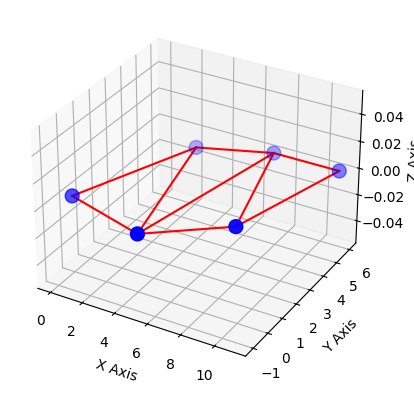

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example array of x, y, z coordinates
#coordinates = np.array([
#    [1, 2, 3],  # p0
#    [4, 5, 6],  # p1
#    [7, 8, 9],  # p2
#    [10, 11, 12],  # p3
#    [13, 14, 15],  # p4
#    [16, 17, 18]   # p5
#])

coordinates = points

# Extracting x, y, z coordinates
x = coordinates[:, 0]
y = coordinates[:, 1]
z = coordinates[:, 2]

# Create a new figure for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the points
ax.scatter(x, y, z, color='b', s=100)  # s controls the size of the points

# Defining the lines to connect the points
lines = [
    (0, 1), (0, 2), (1, 2), (1, 5),
    (2, 3), (2, 5), (3, 5), (3, 4),
    (5, 4)
]

# Plotting the lines
for start, end in lines:
    ax.plot([x[start], x[end]], [y[start], y[end]], [z[start], z[end]], color='r')

# Setting labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Show the plot
plt.show()


In [ ]:
# Animation Code - Create GIF of robot movement
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from PIL import Image
import io
import os

def create_robot_animation():
    """Create an animated GIF of the robot moving through different angle configurations"""
    
    # Create figure for animation
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Animation parameters
    num_frames = 60  # Number of frames in animation
    angle_range = 90  # Degrees to rotate each joint
    
    # Store frames for GIF creation
    frames = []
    
    print("Generating animation frames...")
    
    for frame in range(num_frames):
        # Clear the axes
        ax.clear()
        
        # Calculate angles for this frame (sinusoidal motion for smooth animation)
        t = frame / num_frames * 2 * np.pi
        angle1 = angle_range * np.sin(t) * math.pi / 180
        angle2 = angle_range * np.sin(t + np.pi/3) * math.pi / 180  # Phase offset
        angle3 = angle_range * np.sin(t + 2*np.pi/3) * math.pi / 180  # Different phase offset
        
        # Create state dictionary for current frame
        current_state = {
            q1: angle1,
            q2: angle2,
            q3: angle3
        }
        
        # Calculate points for current configuration
        current_points = [p0final.T, p1final.T, p2final.T, p3final.T, p4final.T, p5final.T]
        current_points = sympy.Matrix(current_points)
        current_points = current_points.subs(current_state)
        current_points = numpy.array(current_points, dtype=float).squeeze()
        
        # Extract coordinates
        x = current_points[:, 0]
        y = current_points[:, 1]
        z = current_points[:, 2]
        
        # Plot points
        ax.scatter(x, y, z, color='b', s=100)
        
        # Define and plot lines
        lines = [
            (0, 1), (0, 2), (1, 2), (1, 5),
            (2, 3), (2, 5), (3, 5), (3, 4),
            (5, 4)
        ]
        
        for start, end in lines:
            ax.plot([x[start], x[end]], [y[start], y[end]], [z[start], z[end]], color='r', linewidth=2)
        
        # Set consistent axis limits and labels
        ax.set_xlim([-5, 15])
        ax.set_ylim([-8, 12])
        ax.set_zlim([-5, 5])
        ax.set_xlabel('X Axis')
        ax.set_ylabel('Y Axis')
        ax.set_zlabel('Z Axis')
        ax.set_title(f'Foldable Robot Animation - Frame {frame+1}/{num_frames}')
        
        # Convert plot to image
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=100, bbox_inches='tight')
        buf.seek(0)
        img = Image.open(buf)
        frames.append(img)
        buf.close()
        
        # Progress indicator
        if (frame + 1) % 10 == 0:
            print(f"Generated {frame + 1}/{num_frames} frames")
    
    # Create and save GIF
    gif_filename = 'robot_animation.gif'
    print(f"Creating GIF: {gif_filename}")
    
    # Save as GIF
    frames[0].save(
        gif_filename,
        save_all=True,
        append_images=frames[1:],
        duration=100,  # Duration per frame in milliseconds
        loop=0  # Infinite loop
    )
    
    plt.close(fig)
    
    print(f"Animation saved as {gif_filename}")
    print(f"File location: {os.path.abspath(gif_filename)}")
    
    return gif_filename

# Create the animation
animation_file = create_robot_animation()